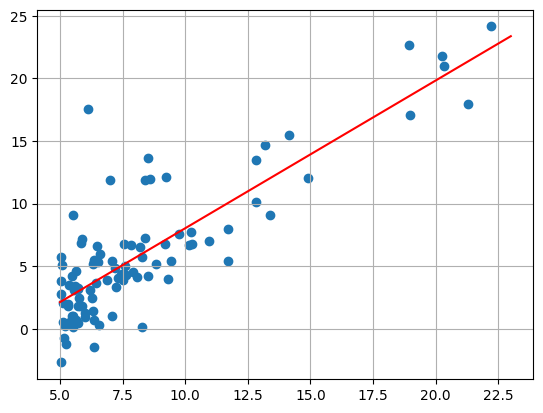

2.1347903452811474 8.033949957353268
[-3.89578088  1.19303364]


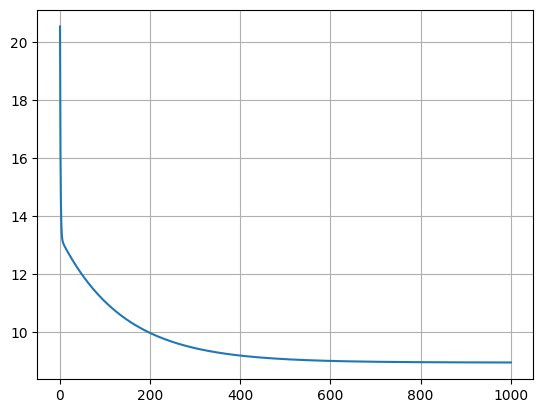

In [1]:
# задание 1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

learning_rate = 0.01
iterations = 1000
y_predict = lambda X, weights: np.dot(X, weights)
df = pd.read_csv('ex1data1.csv', names=['x', 'y'])
plt.scatter(df['x'], df['y'])

def fit(X, target):
    target = np.array(target)
    n = len(X)
    m = len(X.columns)
    X.insert(0, 'x0', [1] * n)
    weights = np.ones(m + 1)
    error_lst = []
    for _ in range(iterations):
        y_pred = y_predict(X, weights)
        MSE = (1 / n) * error(y_pred, target)        # свободный коэффициент это weights[0]
        error_lst.append(MSE)
        grad = (2 / n) * np.dot((y_pred - target), X)
        weights = weights - learning_rate * grad
    return (weights, error_lst)

def error(y_pred, target):
    return sum((y_pred - target) ** 2)

k = fit(df[['x']], df['y'])[0][1]
b = fit(df[['x']], df['y'])[0][0]

func = lambda x: k * x + b
x_error = [i + 1 for i in range(iterations)]
x_lin = np.linspace(5, 23, 100)
plt.plot(x_lin, func(x_lin), color='r')
plt.grid(True)
plt.show()
plt.plot(x_error, fit(df[['x']], df['y'])[1])
plt.grid(True)
print(func(5), func(10))
df.insert(0, 'x0', [1] * len(df))
df_norm = df[['x0', 'x', 'y']]
nump = df_norm[['x0', 'x']].to_numpy()
w1 = np.dot(nump.transpose() , nump)
w1_rev = np.linalg.inv(w1)
w2 = np.dot(w1_rev, nump.transpose())
w3 = np.dot(w2, np.array(df_norm['y']))
print(w3)

340412.6595744667 109447.7964696413 -6578.354854160942
цена дома с 1500 квадратурных футов и 3 спальнями 272199.8632322512
[340412.65957447 109447.79646964  -6578.35485416]


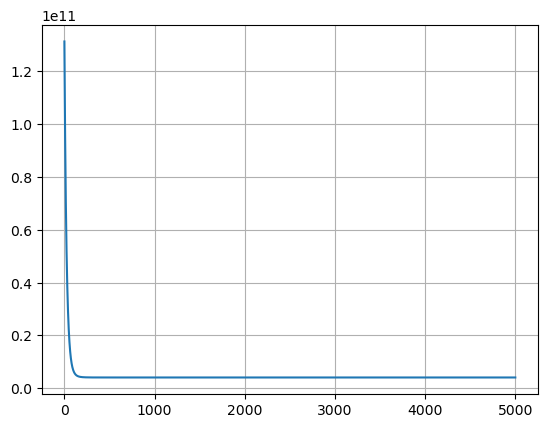

In [3]:
df1 = pd.read_csv('ex1data2.csv', names=['size', 'number', 'price'])
size = np.array(df1['size'])
n1 = len(size)
size_norm = (size - np.mean(size)) / ((np.sqrt(sum((size - np.mean(size))**2))) / n1 ** (0.5))
number = np.array(df1['number'])
n2 = len(number)
number_norm = (number - sum(number) / n2) / ((np.sqrt(sum((number - sum(number) / n2)**2))) / n2 ** (0.5))
df_norm = pd.DataFrame({'x0': [1] * n2, 'size': size_norm, 'number': number_norm, 'price': df1['price']})
b = fit(df_norm[['size', 'number']], df_norm['price'])[0][0]
k1 = fit(df_norm[['size', 'number']], df_norm['price'])[0][1]
k2 = fit(df_norm[['size', 'number']], df_norm['price'])[0][2]
print(b, k1, k2)
func = lambda x1, x2: k1 * x1 + k2 * x2 + b
d1 = ((np.sqrt((sum((size - np.mean(size))**2)))) / n1 ** (0.5))
d2 = ((np.sqrt((sum((number - np.mean(number))**2)))) / n2 ** (0.5))
norm1 = (1500 - sum(size) / n1) / d1
norm2 = (3 - sum(number) / n2) / d2
print('цена дома с 1500 квадратурных футов и 3 спальнями', func(norm1 , norm2))
nump = df_norm[['x0', 'size', 'number']].to_numpy()
w1 = np.dot(nump.transpose() , nump)
w1_rev = np.linalg.inv(w1)
w2 = np.dot(w1_rev, nump.transpose())
w3 = np.dot(w2, np.array(df_norm['price']))
plt.plot(x_error, fit(df_norm[['size', 'number']], df_norm['price'])[1])
plt.grid(True)
print(w3)


6
